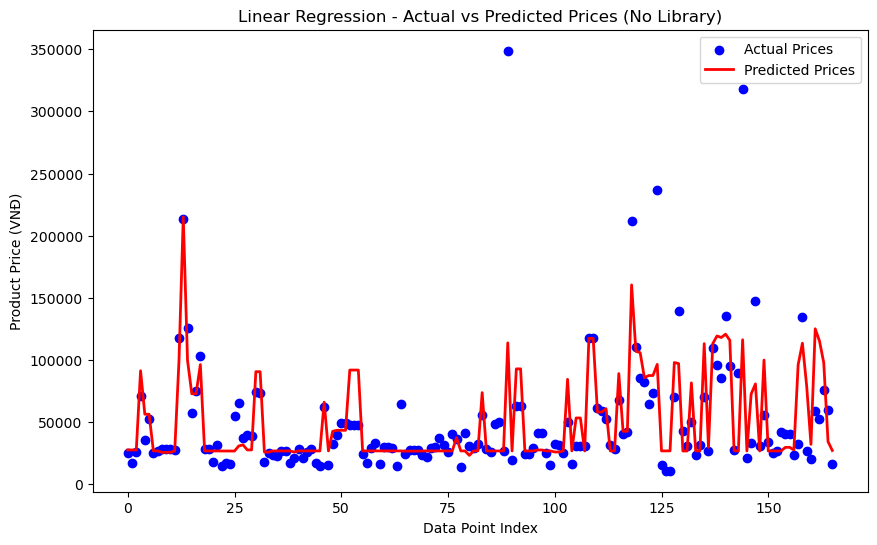

Predicted Price: 50994.82666274121


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('data1.csv')

# Extract features (costs) and target (product price)
X = data[['c_seedling', 'c_fertilizer', 'c_cultivate', 'c_agriTools', 'c_animalFeed',
          'c_medicine', 'c_transport', 'c_maintain', 'c_package', 'c_marketing']].values
y = data['predicted_price'].values

# Normalize the input data
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Add bias column
X = np.c_[np.ones(X.shape[0]), X]

# Gradient descent function
def gradient_descent(X, y, alpha=0.01, iterations=1000):
    m, n = X.shape
    theta = np.zeros(n)
    for _ in range(iterations):
        gradient = (1 / m) * X.T.dot(X.dot(theta) - y)
        theta -= alpha * gradient
    return theta

# Train the model
theta = gradient_descent(X, y)

# Predict prices
y_pred = X.dot(theta)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y)), y, color='blue', label='Actual Prices')
plt.plot(range(len(y)), y_pred, color='red', label='Predicted Prices', linewidth=2)
plt.xlabel('Data Point Index')
plt.ylabel('Product Price (VNĐ)')
plt.title('Linear Regression - Actual vs Predicted Prices (No Library)')
plt.legend()
plt.show()

# Function to predict new data
def predict_new_data(new_data):
    new_data_normalized = (new_data - data[['c_seedling', 'c_fertilizer', 'c_cultivate', 'c_agriTools', 
                                            'c_animalFeed', 'c_medicine', 'c_transport', 'c_maintain', 
                                            'c_package', 'c_marketing']].mean(axis=0)) / \
                           data[['c_seedling', 'c_fertilizer', 'c_cultivate', 'c_agriTools', 'c_animalFeed',
                                 'c_medicine', 'c_transport', 'c_maintain', 'c_package', 'c_marketing']].std(axis=0)
    new_data_normalized = np.insert(new_data_normalized, 0, 1)
    return np.dot(new_data_normalized, theta)

# Example of new data prediction
new_data = np.array([30000, 500, 500, 300, 0, 500, 150, 1000, 300, 500])
predicted_price = predict_new_data(new_data)
print(f"Predicted Price: {predicted_price}")
